In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train_copy.csv')

In [3]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
print("Number of Country/Region is", df['Country/Region'].nunique())

print("Countries with Province/State informed are"
      , df[df['Province/State'].isna()==False]['Country/Region'].unique())

Number of Country/Region is 163
Countries with Province/State informed are ['Australia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France'
 'Netherlands' 'US' 'United Kingdom']


In [5]:
df.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737
std,7624.675152,22.935092,79.923261,3538.599684,174.346267
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000


Text(0.5, 0, 'Date')

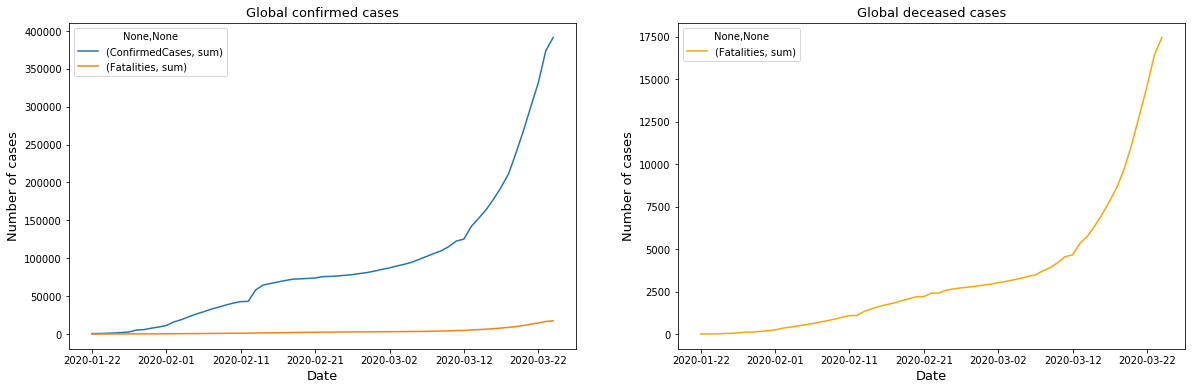

In [6]:
confirmed_dates = df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_dates = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_dates = confirmed_dates.join(fatalities_dates)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
total_dates.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_dates.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

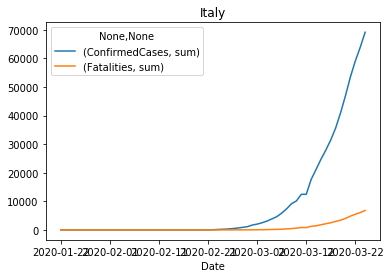

In [7]:
confirmed_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)
total_date_Italy.plot(ax=plt.gca(), title='Italy')

In [8]:
# building datasets for every country
# &(df['Lat'] == df[df['Country/Region'] == c].Lat.iloc[0])
countries_data = {}
for c in df['Country/Region'].unique():
    countries_data[c]=df[(df['Country/Region'] == c)]
    countries_data[c].insert(0, 'New_ID', countries_data[c].Id - countries_data[c].Id.iloc[0])

In [9]:
countries_data['China']

,New_ID,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
2961,0,4372,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0
2962,1,4373,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0
2963,2,4374,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0
2964,3,4375,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0
2965,4,4376,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0
...,...,...,...,...,...,...,...,...,...
5035,3034,7406,Zhejiang,China,29.1832,120.0934,2020-03-20,1234.0,1.0
5036,3035,7407,Zhejiang,China,29.1832,120.0934,2020-03-21,1236.0,1.0
5037,3036,7408,Zhejiang,China,29.1832,120.0934,2020-03-22,1237.0,1.0
5038,3037,7409,Zhejiang,China,29.1832,120.0934,2020-03-23,1238.0,1.0


In [10]:
# applying polynomial regression
x = countries_data['China']
x = x[(x.Lat == 29.1832) & (x.Long == 120.0934)]
x.New_ID = x.New_ID - x.New_ID.iloc[0]
x

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,New_ID,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
4977,0,7348,Zhejiang,China,29.1832,120.0934,2020-01-22,10.0,0.0
4978,1,7349,Zhejiang,China,29.1832,120.0934,2020-01-23,27.0,0.0
4979,2,7350,Zhejiang,China,29.1832,120.0934,2020-01-24,43.0,0.0
4980,3,7351,Zhejiang,China,29.1832,120.0934,2020-01-25,62.0,0.0
4981,4,7352,Zhejiang,China,29.1832,120.0934,2020-01-26,104.0,0.0
...,...,...,...,...,...,...,...,...,...
5035,58,7406,Zhejiang,China,29.1832,120.0934,2020-03-20,1234.0,1.0
5036,59,7407,Zhejiang,China,29.1832,120.0934,2020-03-21,1236.0,1.0
5037,60,7408,Zhejiang,China,29.1832,120.0934,2020-03-22,1237.0,1.0
5038,61,7409,Zhejiang,China,29.1832,120.0934,2020-03-23,1238.0,1.0


In [41]:
def build_model(c, lat, long, target, num):

    data = countries_data[c]
    data = data[(data.Lat == lat) & (data.Long == long)]
    data.New_ID = data.New_ID - data.New_ID.iloc[0]
    #X = np.array(countries_data[c]['New_ID']).reshape(-1, 1)
    #y = np.array(countries_data[c][target])
    X = np.array(data['New_ID']).reshape(-1, 1)
    y = np.array(data[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scores = []

    for i in range(1, 11):
        print("Euation of "+str(i)+" Degree BEGINS")
        poly = PolynomialFeatures(degree=i)
        poly_x = poly.fit_transform(X_train)
        pol_reg = LinearRegression()
        pol_reg.fit(poly_x, y_train)
        print("Euation of "+str(i)+" Degree Ends with acc = "+str(pol_reg.score(poly.fit_transform(X_test), y_test)*100) + "%")
        scores.append(pol_reg.score(poly.fit_transform(X_test), y_test))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    ax1.plot(X, y)
    ax1.set_title(c + " confirmed cases", size=13)
    ax1.set_ylabel("Number of cases", size=13)
    ax1.set_xlabel("Date_ID", size=13)
    ax2.plot(range(1, 11), scores, color='orange')
    ax2.set_title("Accuracy vs. Degree", size=13)
    ax2.set_ylabel("Accuracy", size=13)
    ax2.set_xlabel("Degree", size=13)
    
    # finding best degree for each country
    max_ = 0
    max_i = 0
    for index, acc in enumerate(scores):
        if acc > max_:
            max_ = acc
            max_i = index
    print("Best PolynomialDegree is " + str(max_i+1) + " with accuracy " + str(max_*100) + "%")
    max_i += 1
    poly = PolynomialFeatures(degree=max_i)
    poly_x = poly.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(poly_x, y_train)
    prediction = pol_reg.predict(poly.fit_transform([[num]]))
    return int(prediction)

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -19.881590784870905%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 56.86099042701515%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 92.11826196806034%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 98.65058852528269%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 98.34903163106603%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 97.93249296726869%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 97.93593159231338%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 97.99610306882946%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 97.99130459910639%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 97.96337623047636%
Best PolynomialDegree is 4 with accuracy 98.65058852528269%


332

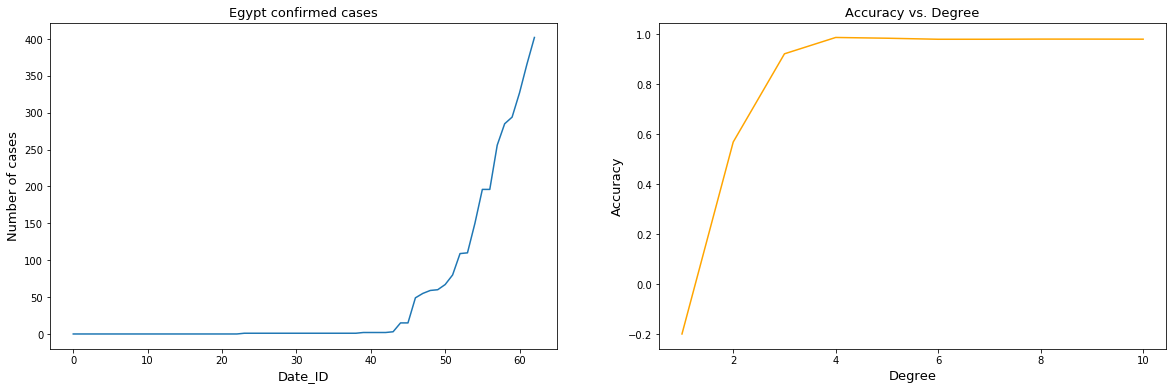

In [42]:
build_model('Egypt',26, 30, 'ConfirmedCases', 60) # for Egypt

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -192.1287532567151%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = -164.86960391029316%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = -14.01993537622863%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 75.26216465786895%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 89.70144410092283%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 93.88963602020584%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 96.54855337654901%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 95.58568782151409%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 93.1089461190845%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 92.58440528168893%
Best PolynomialDegree is 7 with accuracy 96.54855337654901%


13

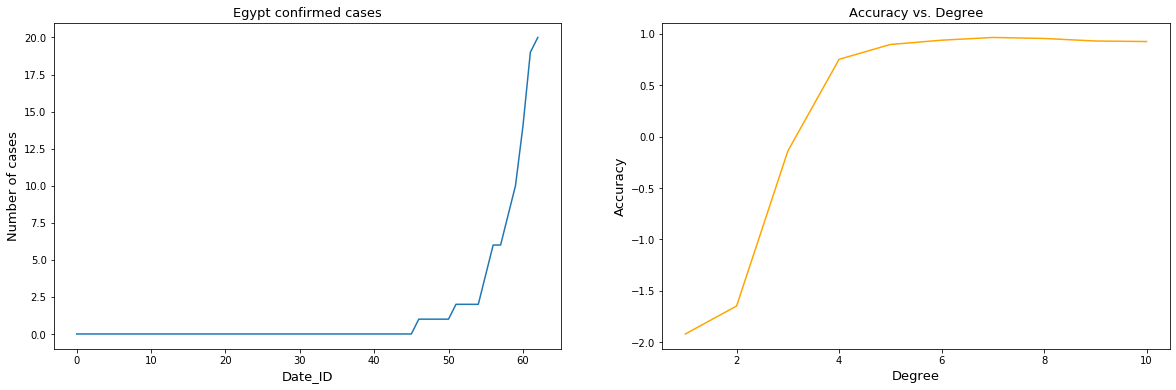

In [43]:
build_model('Egypt',26, 30, 'Fatalities', 60) # for Egypt

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 23.570528599022364%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 53.06059082097925%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 78.64915651116738%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 93.53958839630106%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 98.870763396681%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.81382080134156%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.85964962663988%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.8563344107827%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.85132834077636%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.85621230739412%
Best PolynomialDegree is 7 with accuracy 99.85964962663988%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([151.42840748])

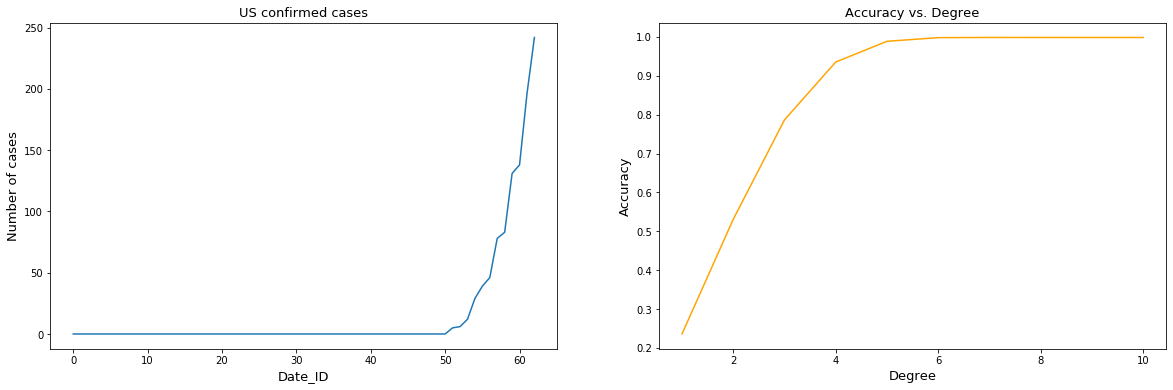

In [12]:
build_model('US',32.3182, -86.9023, 'ConfirmedCases', 60) # for USA

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 67.47565398298275%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 96.19501338328047%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 97.85106780215828%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 98.67244088958823%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 99.8091327391055%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.83081388771399%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.88716415827051%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.95781785324743%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.94288965445956%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.82981499042319%
Best PolynomialDegree is 8 with accuracy 99.95781785324743%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([998.62727846])

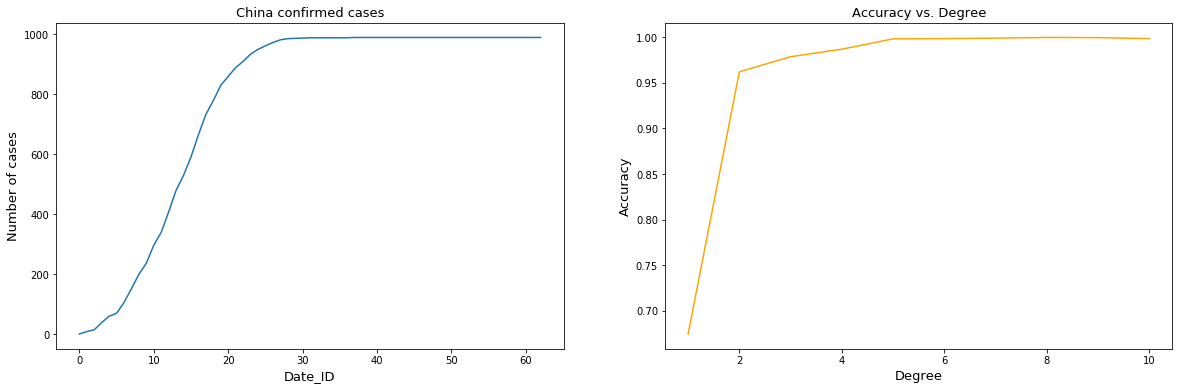

In [13]:
build_model('China', 31.8257 ,117.2264, 'ConfirmedCases', 60) # for France

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -129221.46200891452%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = -53834.69647956061%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = -13638.856072378845%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = -1338.5923802487603%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 7.82012194252829%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = -48.14357145680723%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 84.51023356064567%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 98.6435951837666%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 93.90261841876291%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 89.34695263680422%
Best PolynomialDegree is 8 with accuracy 98.6435951837666%


array([5388.23726595])

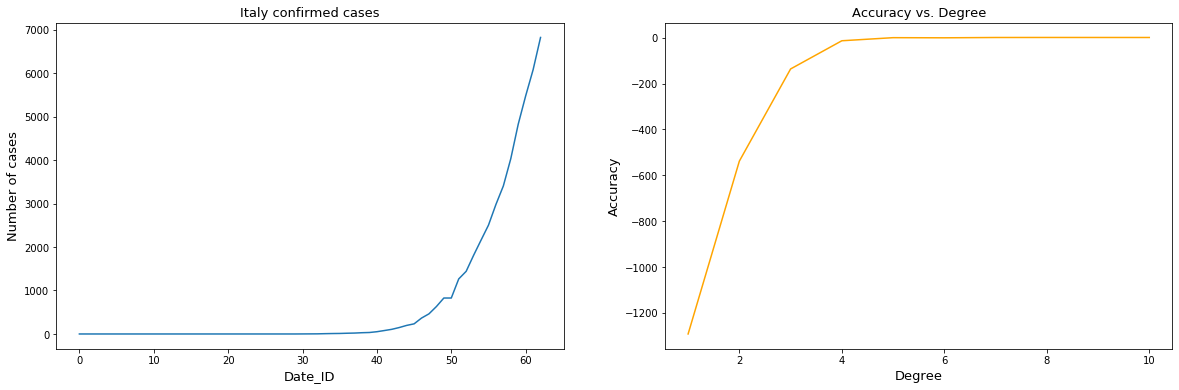

In [14]:
build_model('Italy',43,12, 'Fatalities', 60) # for Italy

In [32]:
build_model('Italy',43,12, 'Fatalities', 60) # for Italy

Best PolynomialDegree is 8 with accuracy 99.89938198554091%


5359

In [25]:
# test file reading
dt = pd.read_csv('test_copy.csv')

In [16]:
dt.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [17]:
X = dt[['Country/Region', 'Lat', 'Long']]
X

,Country/Region,Lat,Long
0,Afghanistan,33.0000,65.0000
1,Afghanistan,33.0000,65.0000
2,Afghanistan,33.0000,65.0000
3,Afghanistan,33.0000,65.0000
4,Afghanistan,33.0000,65.0000
...,...,...,...
12207,Zambia,-15.4167,28.2833
12208,Zambia,-15.4167,28.2833
12209,Zambia,-15.4167,28.2833
12210,Zambia,-15.4167,28.2833


In [26]:
dt.iloc[0, 2], dt.iloc[0, 3], dt.iloc[0, 4]

('Afghanistan', 33.0, 65.0)

In [38]:
import csv
with open('mysubmissions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ForecastId", "ConfirmedCases", "Fatalities"])

writing to 1th row
Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 68.05670784448711%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 78.06770293262622%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 72.84386529647797%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 75.02894790908033%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 78.63656699561557%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 81.73018660645918%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 85.91515892114582%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 91.55581618969958%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 95.76565768245214%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 97.03840578971104%
Best PolynomialDegree is 10 with accuracy 97.03840578971104%
Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 0.0%
Euation of 2 Degree BEGINS
Eua

Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 0.0%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 0.0%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 0.0%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 0.0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7th row
Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 59.649717790365074%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 85.14144047115893%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 87.59574656929777%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 88.52503871494746%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 89.50918976973445%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 90.7133926931662%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 92.53293486127863%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 94.16192072651435%
Euation

/home/magneto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/magneto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KeyboardInterrupt: 

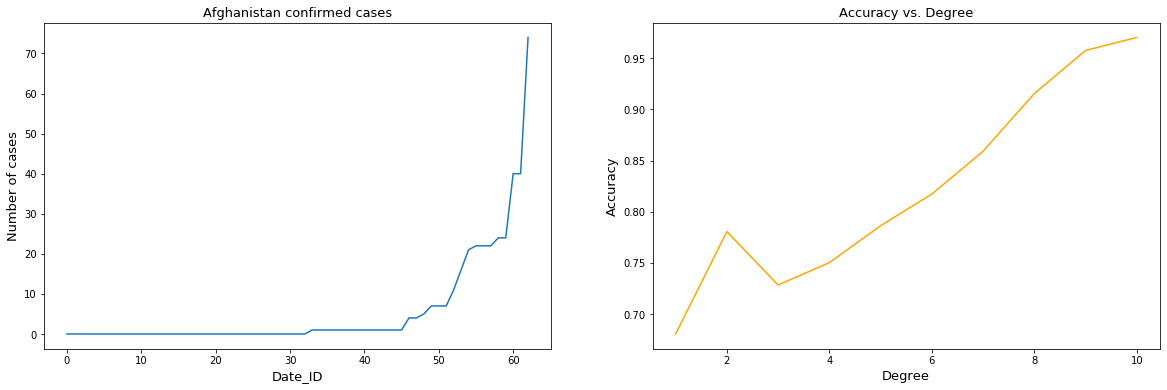

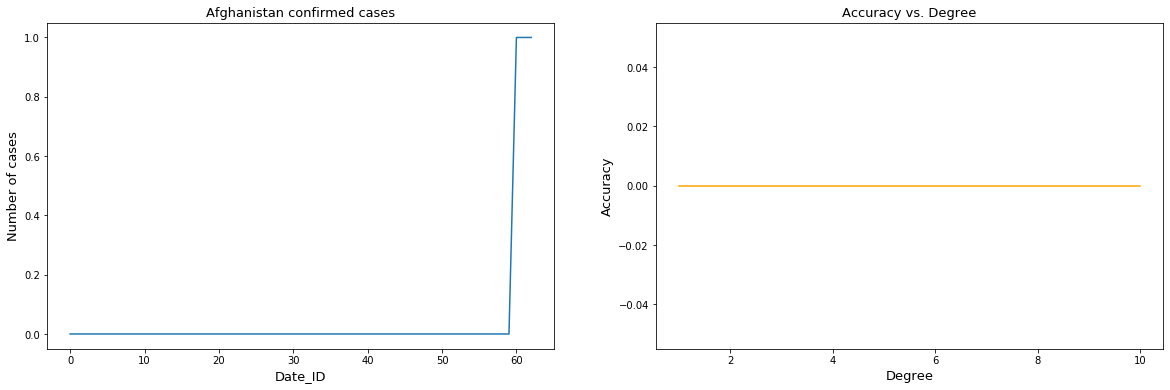

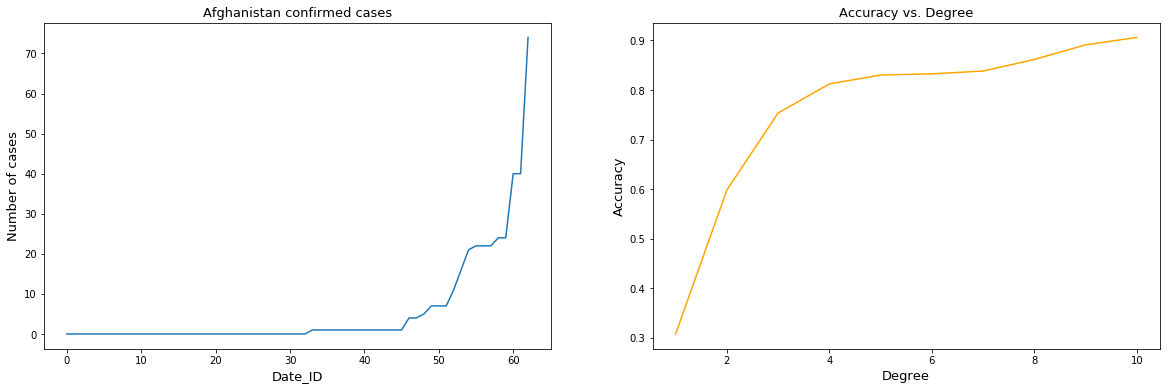

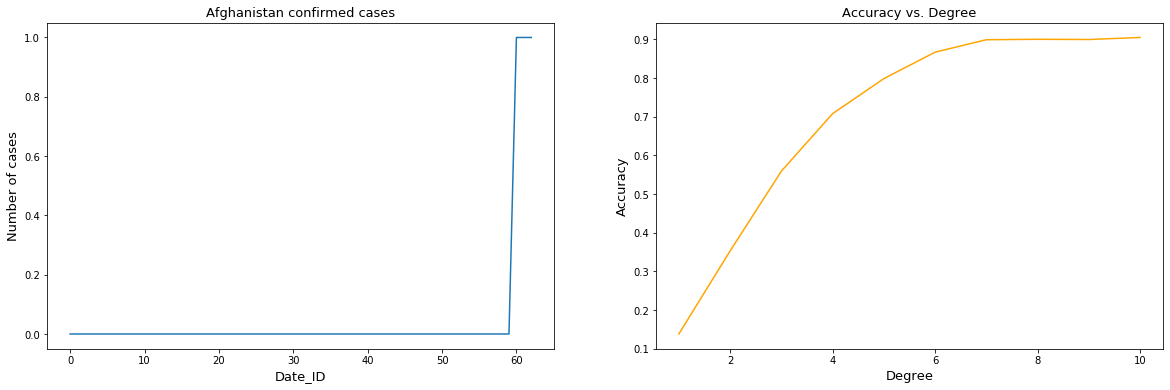

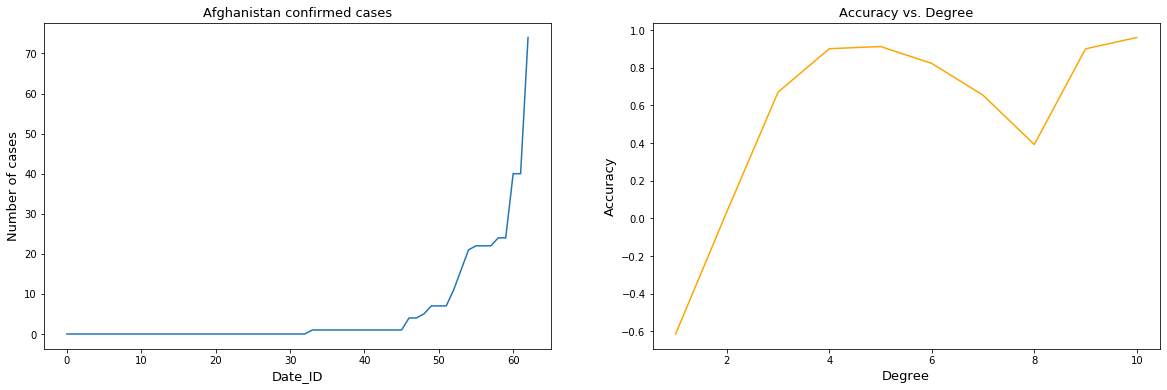

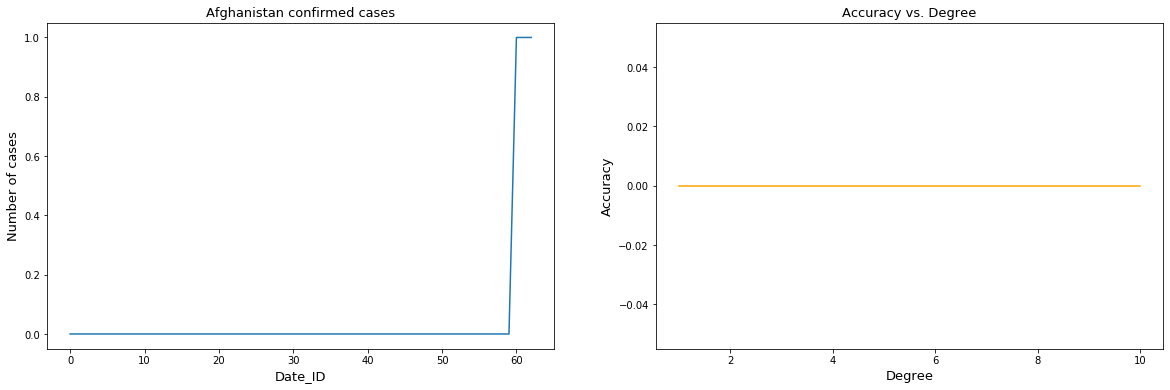

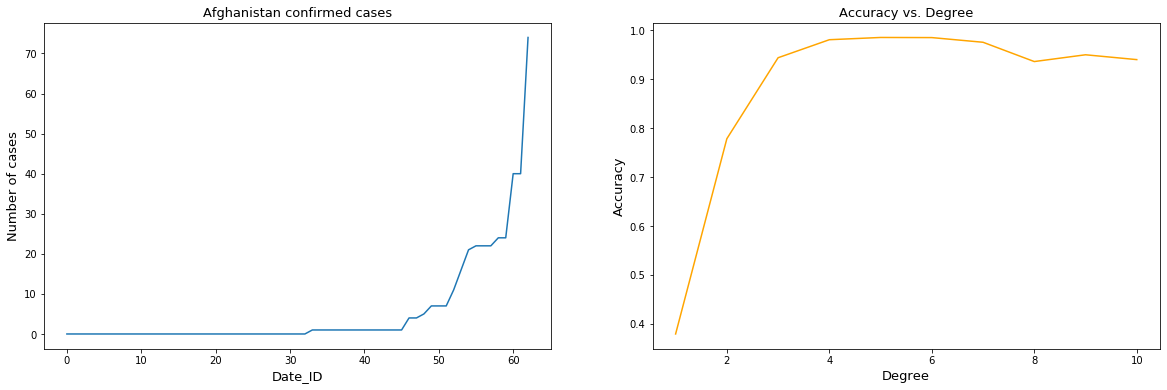

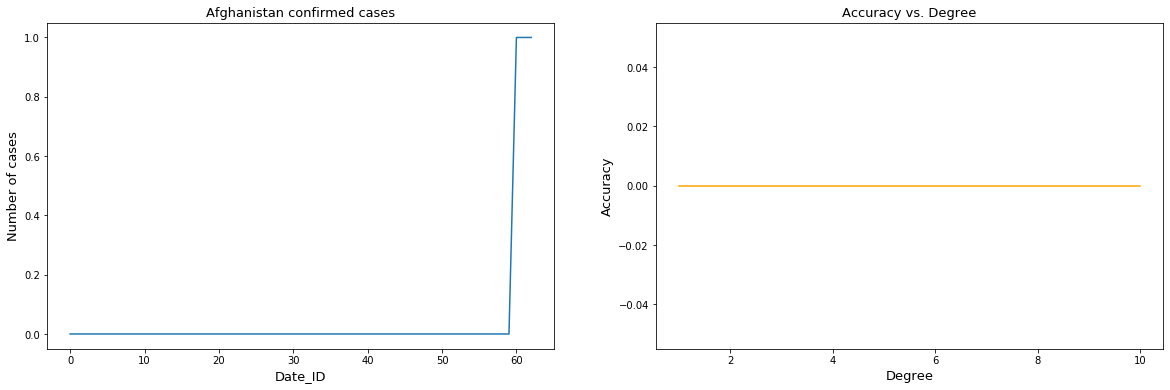

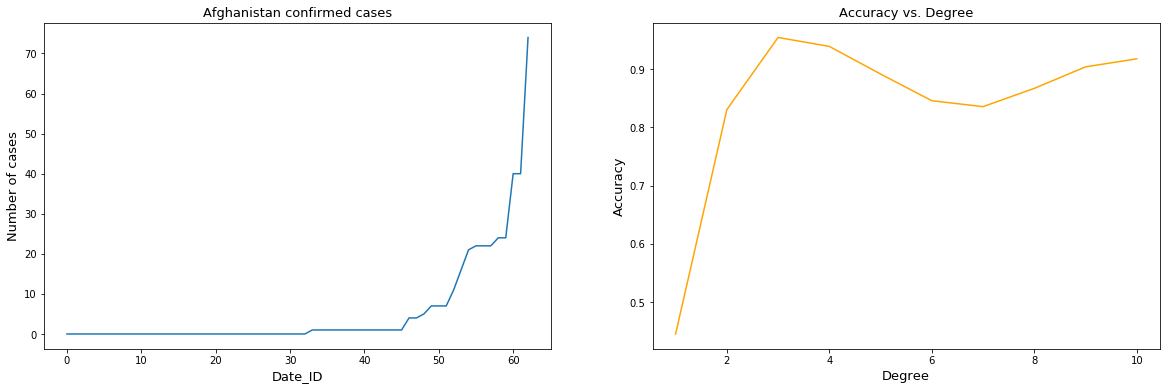

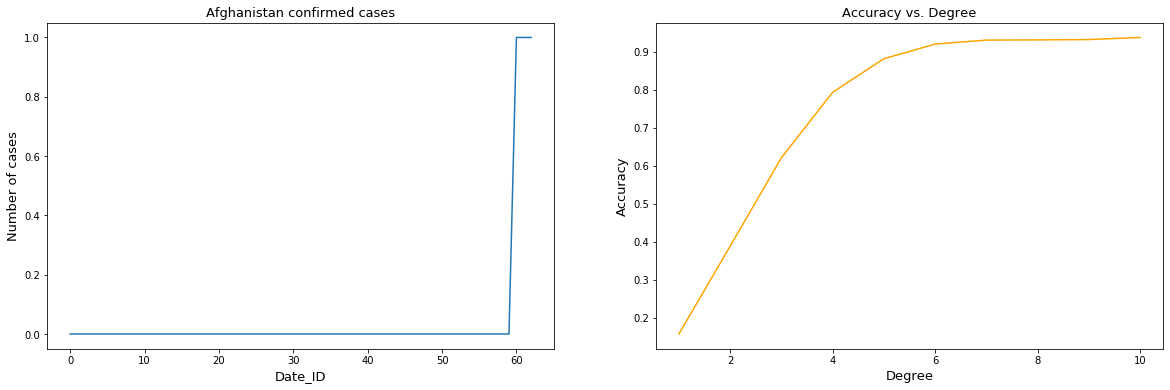

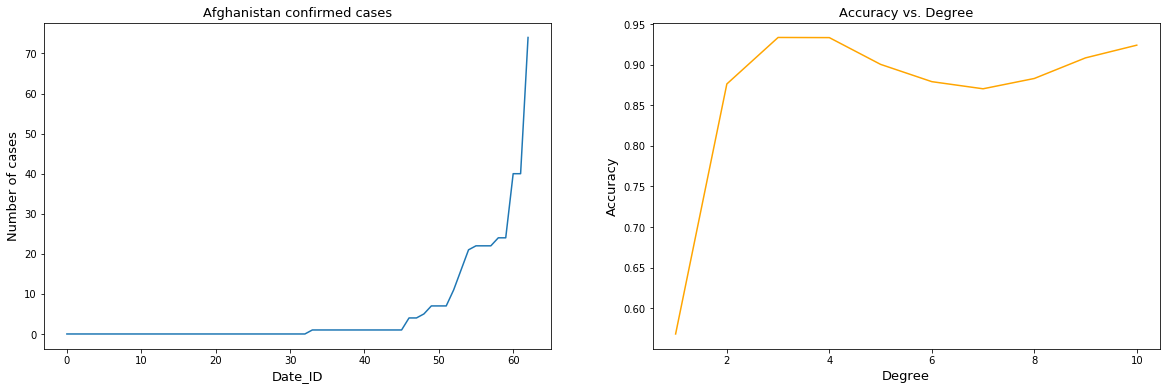

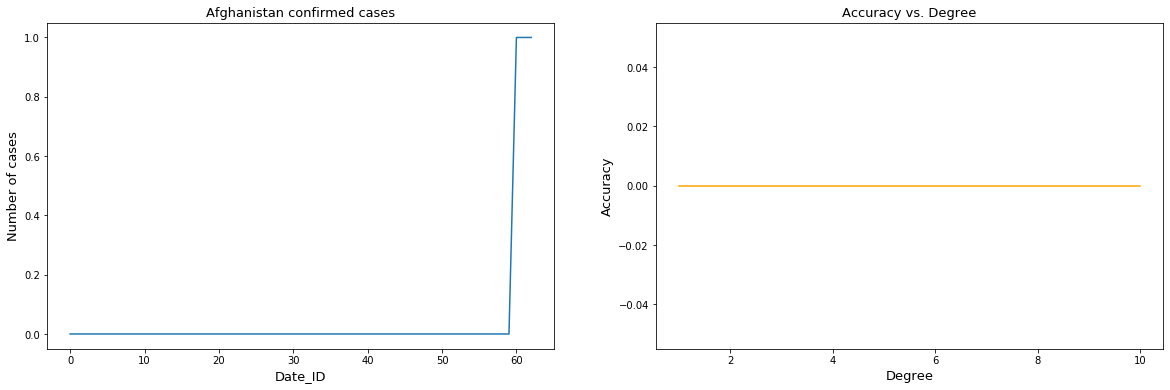

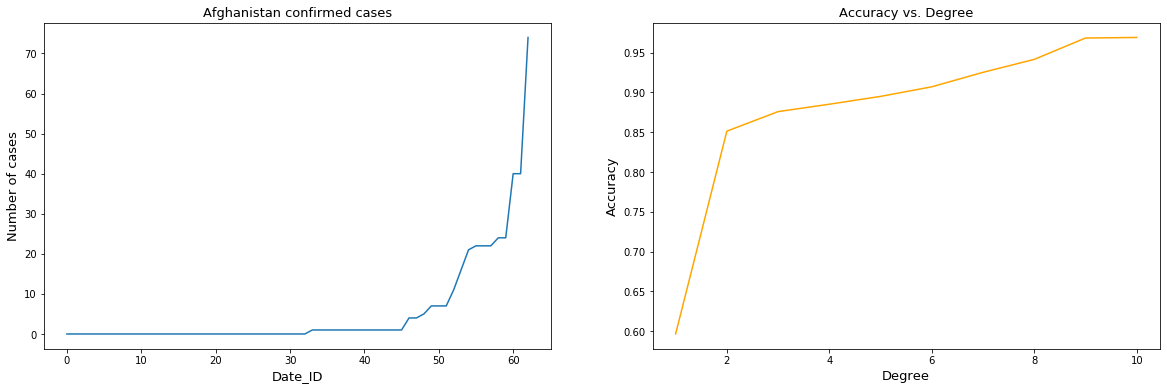

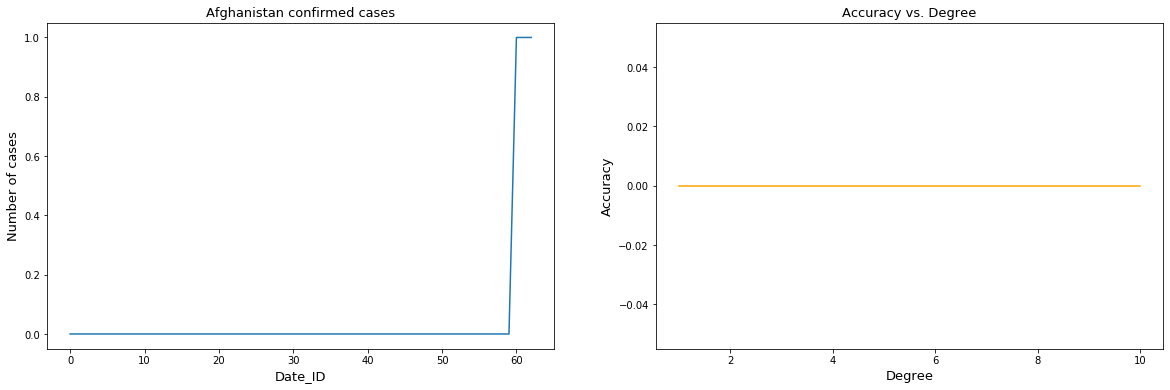

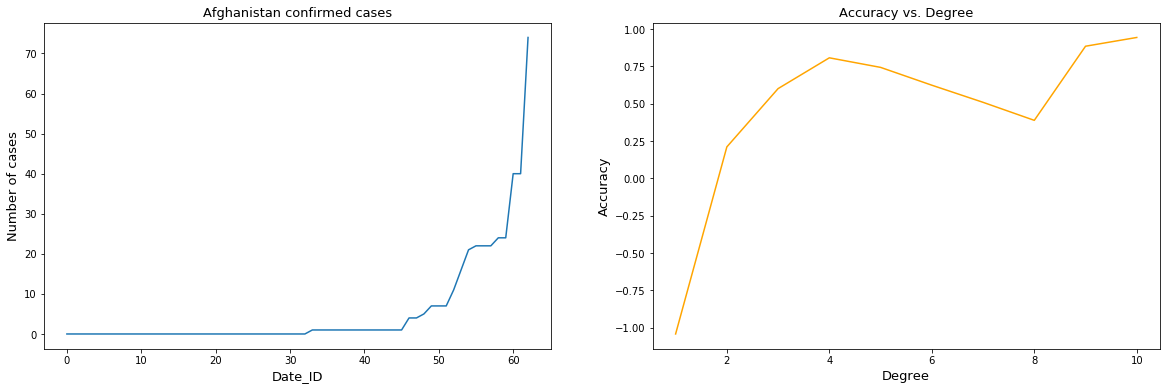

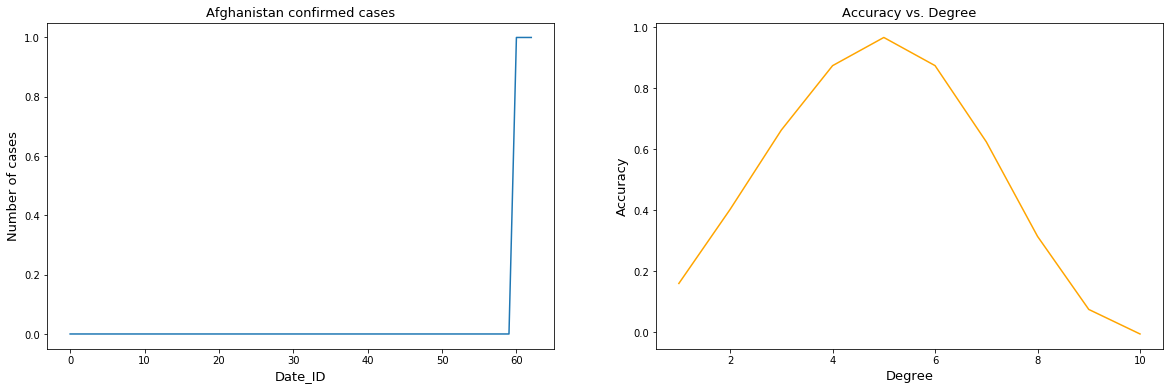

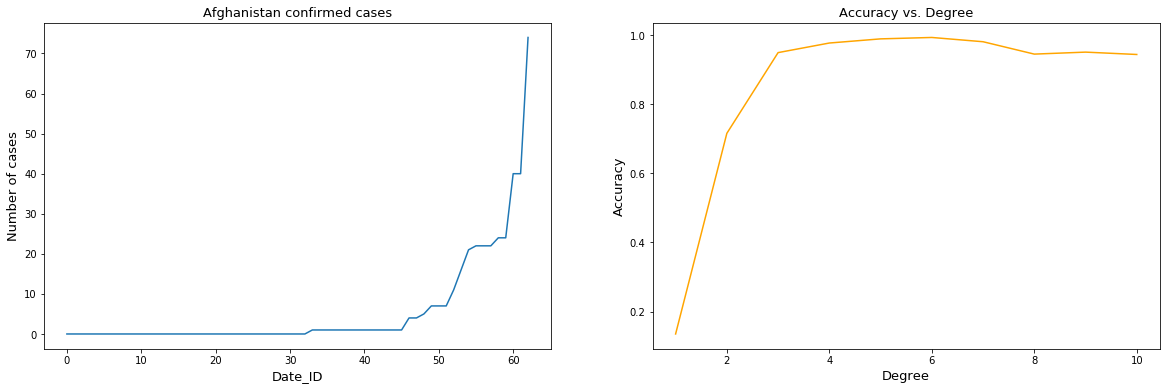

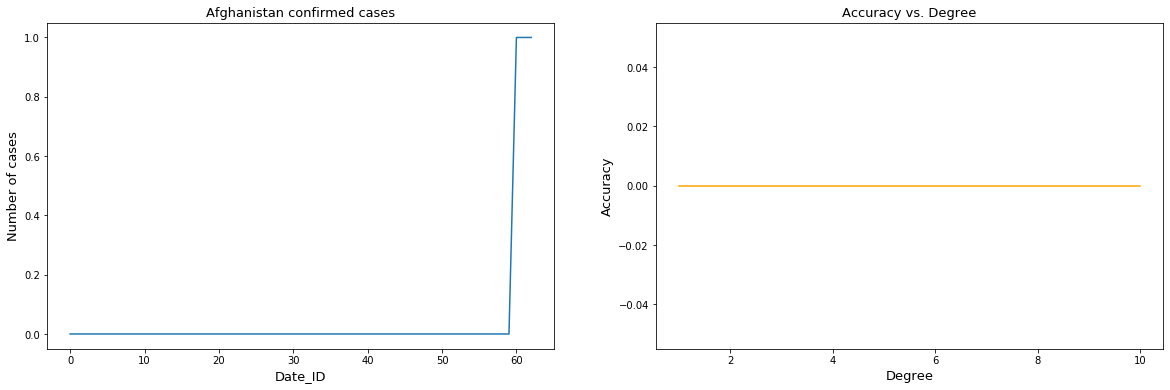

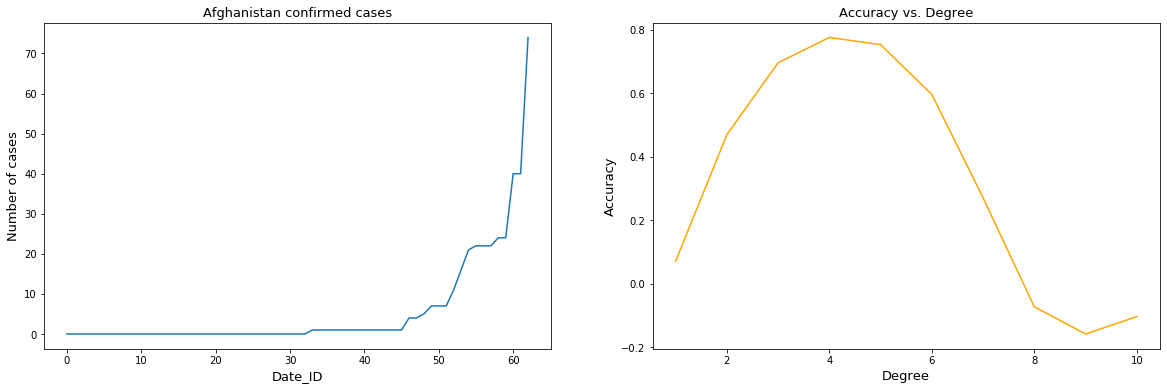

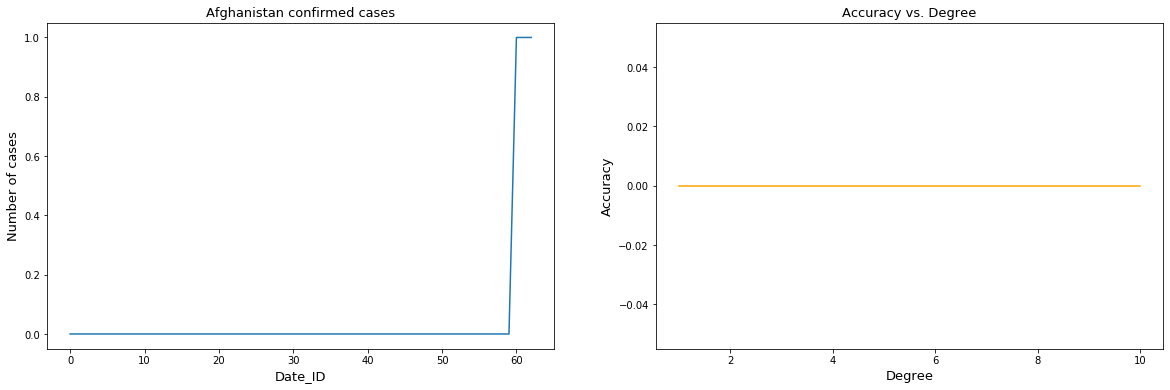

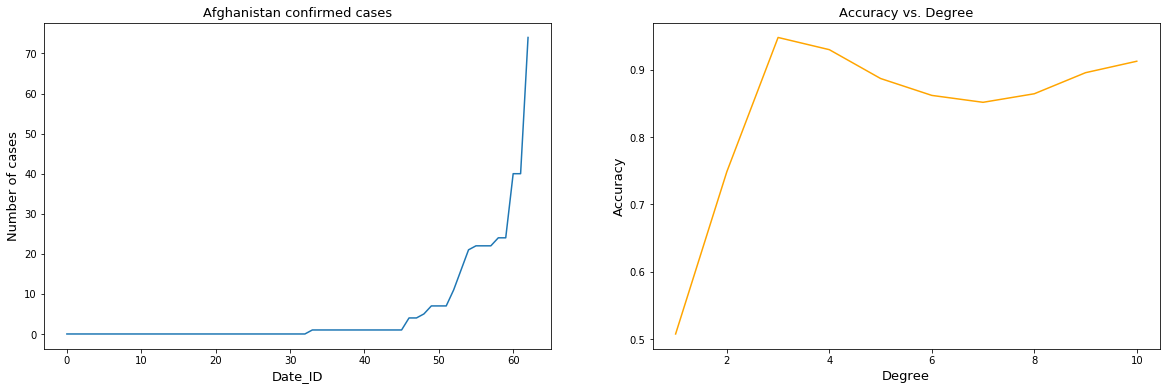

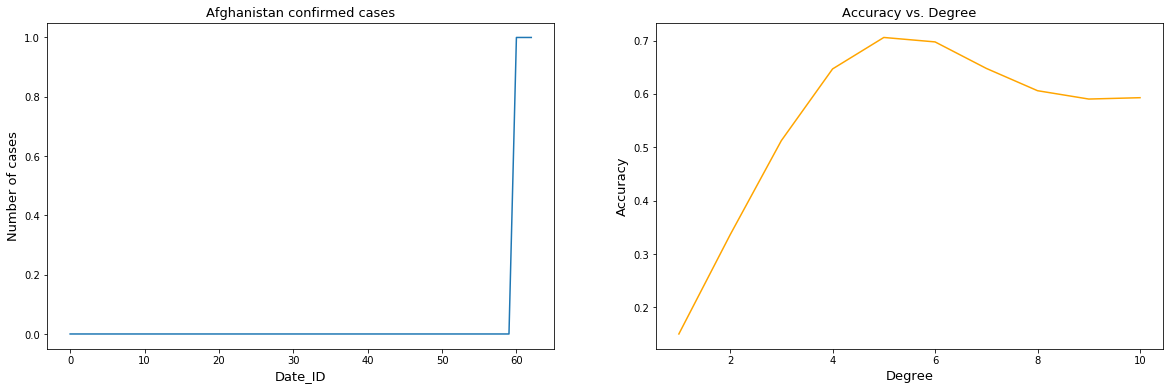

In [52]:
counter = 50
with open('mysubmissions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ForecastId", "ConfirmedCases", "Fatalities"])
    for i in range(1, len(dt)+1):
        print('writing to ' + str(i) + 'th row')
        writer.writerow([i,build_model(dt.iloc[i, 2], dt.iloc[i, 3], dt.iloc[i, 4], 'ConfirmedCases', counter),
            build_model(dt.iloc[i, 2], dt.iloc[i, 3], dt.iloc[i, 4], 'Fatalities', counter)])
    if counter == 93:
        counter = 50
    else:
        counter += 1